In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("C:\\Users\\maheshkatte\\Downloads\\mtcars1.csv")

In [7]:
df.head()


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [8]:
print(df.shape)

(32, 12)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [14]:
df.isna().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
df.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [19]:
x = df.drop(columns=["model", "mpg"])
y = df["mpg"]

In [20]:
x

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [34]:
poly_reg = PolynomialFeatures(degree=3)
pol_reg = LinearRegression()


In [35]:
x_poly = poly_reg.fit_transform(x)
x_poly

array([[  1.,   6., 160., ...,  64.,  64.,  64.],
       [  1.,   6., 160., ...,  64.,  64.,  64.],
       [  1.,   4., 108., ...,  16.,   4.,   1.],
       ...,
       [  1.,   6., 145., ..., 150., 180., 216.],
       [  1.,   8., 301., ..., 200., 320., 512.],
       [  1.,   4., 121., ...,  32.,  16.,   8.]])

In [36]:
lin_reg = LinearRegression()

lin_reg.fit(x,y)

LinearRegression()

In [37]:
lin_reg.score(x,y)

0.8690157644777647

In [39]:
pol_reg.fit(x_poly, y)

LinearRegression()

In [40]:
pol_reg.score(x_poly, y)

1.0

In [41]:
data = pd.read_csv("C:\\Users\\maheshkatte\\Downloads\\position_salaries1.csv") 

In [42]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [71]:
#always pass data in 2D array format else it will give error of getting 1D array instead of 2D array

x = data[["Level"]]
y = data[["Salary"]]

In [52]:
poly_reg = PolynomialFeatures(degree=1)
x_poly = poly_reg.fit_transform(x)
pol_reg.fit(x_poly, y)
ypred1 = pol_reg.predict(x_poly)

In [53]:
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x)
pol_reg.fit(x_poly, y)
ypred2 = pol_reg.predict(x_poly)

In [55]:
poly_reg = PolynomialFeatures(degree = 3)
x_poly = poly_reg.fit_transform(x)
pol_reg.fit(x_poly, y)
ypred3 = pol_reg.predict(x_poly)

In [56]:
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x)
pol_reg.fit(x_poly, y)
ypred4 = pol_reg.predict(x_poly)

In [67]:
poly_reg = PolynomialFeatures(degree=5)
x_poly = poly_reg.fit_transform(x)
pol_reg.fit(x_poly, y)
ypred5 = pol_reg.predict(x_poly)

poly_reg = PolynomialFeatures(degree=14)
x_poly = poly_reg.fit_transform(x)
pol_reg.fit(x_poly, y)
ypred14 = pol_reg.predict(x_poly)

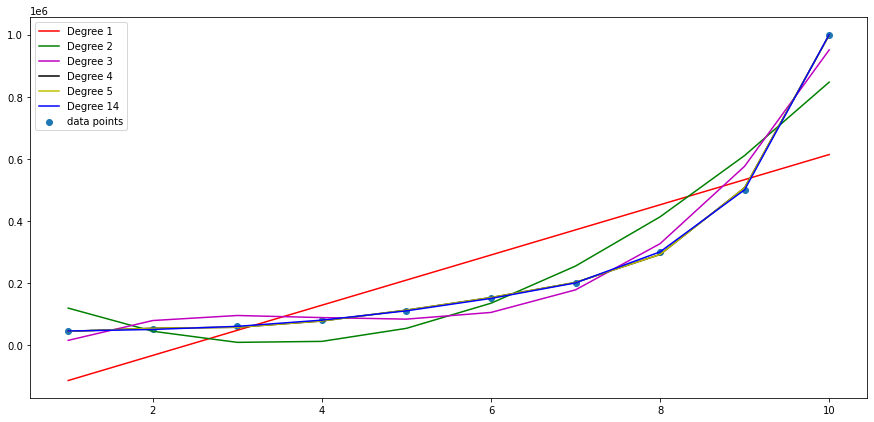

In [70]:
plt.figure(figsize=(15,7))

plt.scatter(x,y,label="data points")
plt.plot(x,ypred1, color='r',label="Degree 1")
plt.plot(x,ypred2, color='g',label="Degree 2")
plt.plot(x,ypred3, color='m',label="Degree 3")
plt.plot(x,ypred4, color='k',label="Degree 4")
plt.plot(x,ypred5, color='y',label="Degree 5")
plt.plot(x,ypred14, color='b',label="Degree 14")
plt.legend()